In [0]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.layers import LeakyReLU

if not os.path.isdir('models'):
    os.mkdir('models')

In [3]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


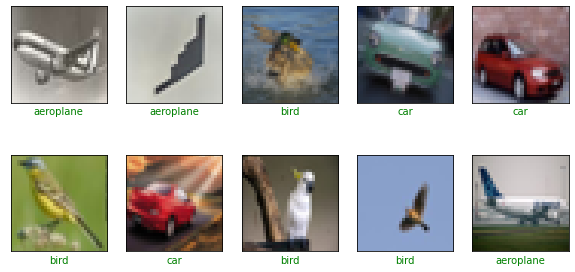

In [4]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i])== np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()
show_random_examples(x_train, y_train, y_train)


In [5]:
def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model
  model = tf.keras.models.Sequential()
  model.add(Input(shape=(32, 32, 3)))
  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)
  model.add(Flatten())
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
  return model
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0

Epoch 1/10
938/938 [==============================] - 97s 104ms/step - loss: 0.7727 - accuracy: 0.7119 - val_loss: 0.5968 - val_accuracy: 0.7870
Epoch 2/10
938/938 [==============================] - 97s 103ms/step - loss: 0.5276 - accuracy: 0.7873 - val_loss: 0.4338 - val_accuracy: 0.8440
Epoch 3/10
938/938 [==============================] - 97s 104ms/step - loss: 0.4544 - accuracy: 0.8232 - val_loss: 0.6996 - val_accuracy: 0.7893
Epoch 4/10
938/938 [==============================] - 97s 104ms/step - loss: 0.4128 - accuracy: 0.8397 - val_loss: 0.3820 - val_accuracy: 0.8560
Epoch 5/10
938/938 [==============================] - 101s 107ms/step - loss: 0.3739 - accuracy: 0.8554 - val_loss: 0.3254 - val_accuracy: 0.8783
Epoch 6/10
938/938 [==============================] - 100s 107ms/step - loss: 0.3531 - accuracy: 0.8636 - val_loss: 0.3393 - val_accuracy: 0.8690
Epoch 7/10
938/938 [==============================] - 100s 107ms/step - loss: 0.3278 - accuracy: 0.8726 - val_loss: 0.2978 - val

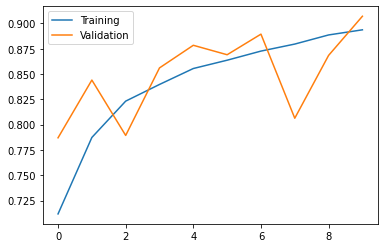

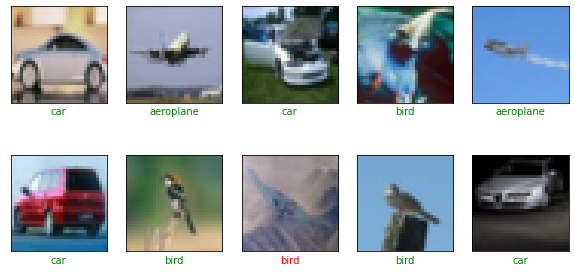

In [6]:
h=model.fit(x_train/255., y_train, validation_data=(x_test/255., y_test), 
            epochs=10, batch_size=16,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                        patience=3),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                       save_best_only=True, save_weights_only=False, 
                       monitor='val_accuracy')])

accs = h.history['accuracy']
val_accs = h.history['val_accuracy']
plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()
preds=model.predict(x_test/255.)
show_random_examples(x_test, y_test, preds)

This code can be used to run the model multiple times and returns predicted labels of 10 random test images


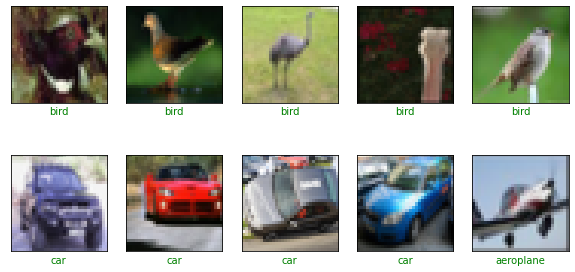

In [7]:
preds=model.predict(x_test/255.)
show_random_examples(x_test, y_test, preds)